In [19]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"

In [20]:
ads = pd.read_csv('data/Ads_CTR_Optimisation.csv')

In [21]:
df = ads.copy()
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# Random Selection

In [26]:
N = 10000
d = 10

selecteds = []
toplam = 0

for n in range(N):
    ad = random.randrange(d)
    selecteds.append(ad)
    odul= df.values[n, ads]
    toplam += odul
toplam

array([[1295, 1703, 1703, ..., 1703, 1295, 1703],
       [1703, 1703, 1703, ..., 1703, 1295, 1703],
       [1703, 1703, 1703, ..., 1703, 1703, 1703],
       ...,
       [1703, 1703, 1703, ..., 1703, 1703, 1703],
       [1295, 1703, 1703, ..., 1295, 1703, 1703],
       [1703, 1295, 1703, ..., 1703, 1703, 1703]])

# Upper Confidence Bound

In [38]:
import math
N = 10000 # Reklam tıklanma sayısı
d = 10    # Toplam ilan sayısı

selecteds = []
    
toplam     = 0  # Toplam odul

# Ri(n)
oduller    = [0] * d # ilk basta tum oduller sifir 

# Ni(n)
tiklamalar = [0] * d # O ana kadar ki tiklanma adedi

for n in range(N):
    ad      = 0 # secilen ilan
    max_ucb = 0
    
    for i in range(d):
        
        if (tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta    = math.sqrt(3/2 * math.log(n) / tiklamalar[i])
            ucb      = ortalama + delta
        else:
            ucb = N * 10
            
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i
    selecteds.append(ad)
    tiklamalar[ad] += 1
    odul    = df.values[n, ad]
    oduller[ad]    += odul
    toplam += odul

2211

(array([ 502.,  364.,  278.,  317., 6434.,  147.,  326., 1130.,  331.,
         171.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

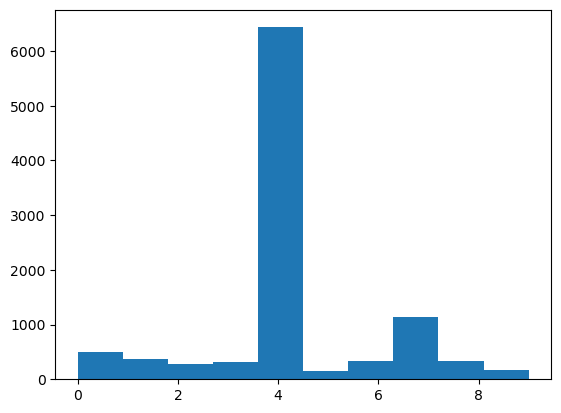

In [40]:
toplam
plt.hist(selecteds)
plt.show()

# Thompson Sampling

In [41]:
import math
N = 10000 # Reklam tıklanma sayısı
d = 10    # Toplam ilan sayısı

selecteds = []

    
toplam    = 0  # Toplam odul

sifirlar  = [0] * d
birler    = [0] * d

for n in range(N):
    max_ucb = 0
    max_th  = 0 
    for i in range(d):
        rast_beta = random.betavariate(birler[i] + 1, sifirlar[i] + 1)
        if rast_beta > max_th:
            max_th = rast_beta
            ad = i
            
    selecteds.append(ad)
    odul    = df.values[n, ad]
    
    if odul == 1:
        birler[ad]   += 1
    else:
        sifirlar[ad] += 1
        
    toplam += odul

(array([ 176.,   67.,   46.,   58., 9212.,   24.,   75.,  242.,   68.,
          32.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

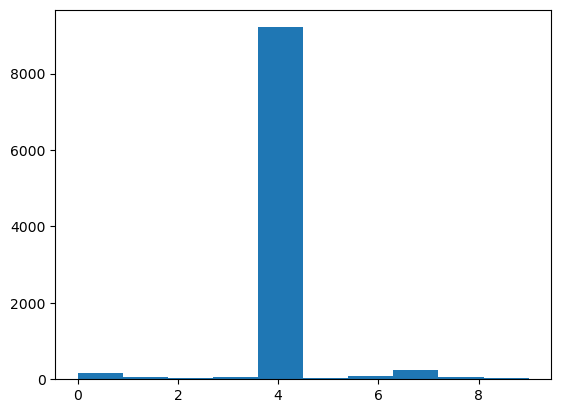

In [43]:
plt.hist(selecteds)
plt.show()